In [ ]:
import pandas as pd
import yfinance as yf
import time
import os

# Load your CSV
df = pd.read_csv("Pre_2020_all_stocks_latest_analysis.csv")

# Extract clean stock tickers (e.g., ANGELONE.NS from ANGELONE.NS_yearly_analysis)
df['Ticker'] = df['Stock'].apply(lambda x: x.split("_")[0])

# Dictionary to cache fetched sectors
sector_map = {}

# Fetch sector for each stock
for ticker in df['Ticker'].unique():
    try:
        print(f"Fetching sector for: {ticker}")
        info = yf.Ticker(ticker).info
        sector = info.get("sector", "Unknown")
        sector_map[ticker] = sector
        time.sleep(1)  # avoid rate limiting
    except Exception as e:
        print(f"Error fetching {ticker}: {e}")
        sector_map[ticker] = "Unknown"

# Map sectors back to DataFrame
df['Sector'] = df['Ticker'].map(sector_map)

# Create output directory
output_dir = "sector_wise_csvs"
os.makedirs(output_dir, exist_ok=True)

# Save each sector's data into a separate CSV
for sector, sector_df in df.groupby("Sector"):
    clean_sector = sector.replace("/", "_").replace(" ", "_")
    file_name = f"{output_dir}/{clean_sector}.csv"
    sector_df.to_csv(file_name, index=False)
    print(f"Saved {file_name} with {len(sector_df)} stocks")

print("✅ All sectors processed and saved.")


Fetching sector for: 20MICRONS.NS
Fetching sector for: 360ONE.NS
Fetching sector for: 3MINDIA.NS
Fetching sector for: 5PAISA.NS
Fetching sector for: AAVAS.NS
Fetching sector for: ABBOTINDIA.NS
Fetching sector for: ABREL.NS
Fetching sector for: ADANIGREEN.NS
Fetching sector for: AFFLE.NS
Fetching sector for: AGARIND.NS
Fetching sector for: AGRITECH.NS
Fetching sector for: AGROPHOS.NS
Fetching sector for: AIAENG.NS
Fetching sector for: AKASH.NS
Fetching sector for: ALANKIT.NS
Fetching sector for: AMBIKCO.NS
Fetching sector for: AMRUTANJAN.NS
Fetching sector for: ANUP.NS
Fetching sector for: APARINDS.NS
Fetching sector for: APLAPOLLO.NS
Fetching sector for: APLLTD.NS
Fetching sector for: APOLLO.NS
Fetching sector for: APOLLOPIPE.NS
Fetching sector for: APOLSINHOT.NS
Fetching sector for: APTECHT.NS
Fetching sector for: ARMANFIN.NS
Fetching sector for: ASAHISONG.NS
Fetching sector for: ASAL.NS
Fetching sector for: ASHIANA.NS
Fetching sector for: ASTRAL.NS
Fetching sector for: ATGL.NS
Fetchi

In [ ]:
import shutil

# Replace 'your_folder_name' with the name of the folder you want to zip
folder_to_zip = 'sector_wise_csvs'
zip_filename = 'sector_wise_csvs.zip'

# Create zip file
shutil.make_archive(base_name=zip_filename.replace('.zip', ''), format='zip', root_dir=folder_to_zip)

print(f"Zipped folder saved as: {zip_filename}")


Zipped folder saved as: sector_wise_csvs.zip


<Axes: title={'center': 'Avg Years to S-Curve by Sector'}, ylabel='Sector'>

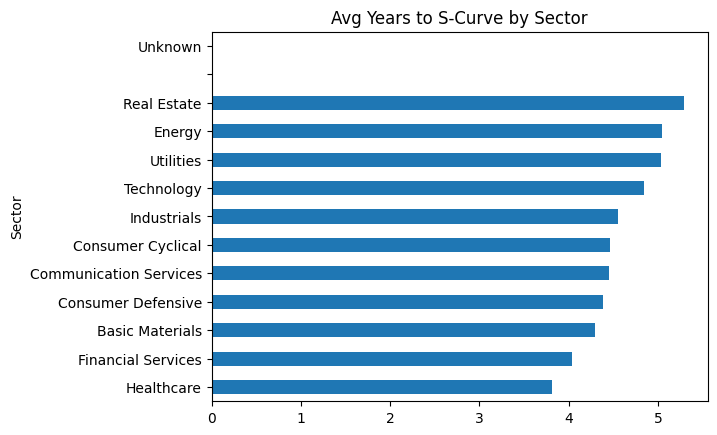

In [ ]:
sector_growth = df.groupby('Sector')['Years to S-Curve Start'].mean().sort_values()
sector_growth.plot(kind='barh', title='Avg Years to S-Curve by Sector')


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Directory with sector-wise CSVs
folder = "sector_wise_csvs"
all_sector_data = []

# Load and combine all CSVs
for file in os.listdir(folder):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, file))
        df["Sector"] = file.replace(".csv", "")
        all_sector_data.append(df)

# Combine into one DataFrame
combined_df = pd.concat(all_sector_data, ignore_index=True)



<ipython-input-10-a2fd4e70fbf7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_curve.values, y=avg_curve.index, palette="coolwarm")


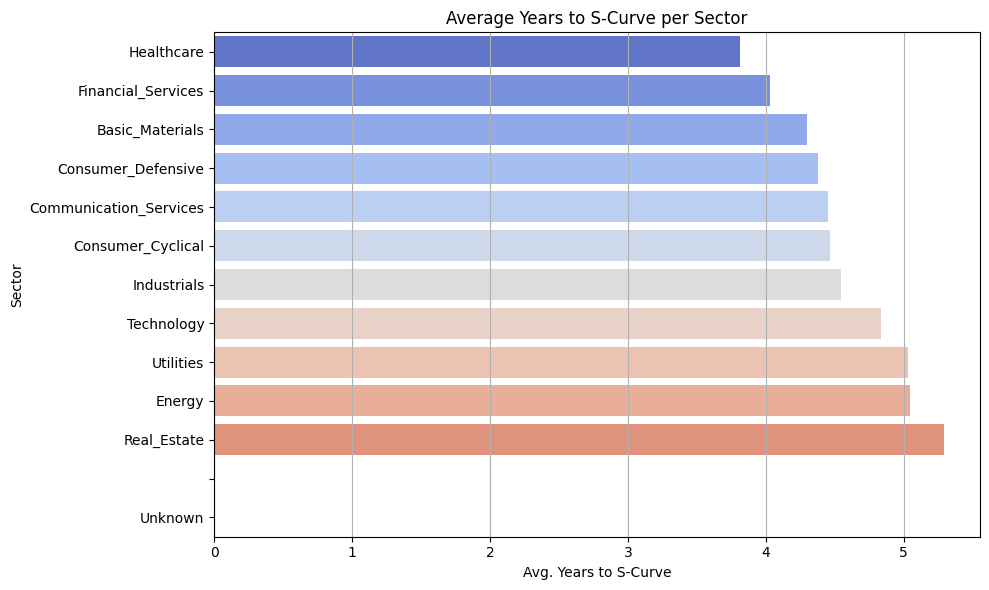

In [ ]:
# Group by sector and calculate mean
avg_curve = combined_df.groupby("Sector")["Years to S-Curve Start"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_curve.values, y=avg_curve.index, palette="coolwarm")
plt.title("Average Years to S-Curve per Sector")
plt.xlabel("Avg. Years to S-Curve")
plt.ylabel("Sector")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [ ]:

# Hot sectors: lowest average Years to S-Curve Start
hot_sectors = df.groupby("Sector")["Years to S-Curve Start"].mean().nsmallest(5).index

underperformers = df[
    (df["Sector"].isin(hot_sectors)) &
    (df["Years to S-Curve Start"] > df.groupby("Sector")["Years to S-Curve Start"].transform("mean"))
]

print("Underperformers in hot sectors:")
print(underperformers[["Ticker", "Sector", "Years to S-Curve Start"]].head())

print("Hot sectors (fast S-curve growth):")
print(hot_sectors.tolist())



Underperformers in hot sectors:
            Ticker             Sector  Years to S-Curve Start
147      AMDIND.NS  Consumer_Cyclical                     5.0
148     ARCHIES.NS  Consumer_Cyclical                     5.0
149  ASAHIINDIA.NS  Consumer_Cyclical                     5.0
150   AYMSYNTEX.NS  Consumer_Cyclical                     5.0
151  BALKRISHNA.NS  Consumer_Cyclical                     5.0
Hot sectors (fast S-curve growth):
['Consumer_Cyclical']
